In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import DataFrame
from pandas import TimeGrouper
from pandas import Series
from datetime import datetime
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import KFold

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/bike-share-demand/train.csv
/kaggle/input/bike-share-demand/sampleSubmission.csv
/kaggle/input/bike-share-demand/test.csv


In [ ]:
train_df = pd.read_csv('../input/bike-share-demand/train.csv')
train_df.head(26)

,datetime,season,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,cnt
0,2011-01-01 00:00:00,1,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,2011-01-01 06:00:00,1,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [ ]:
test_df = pd.read_csv('../input/bike-share-demand/test.csv')
test_df.head(26)

,datetime,season,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,4,1,1,0.26,0.2273,0.56,0.3881
1,2011-01-20 01:00:00,1,0,4,1,1,0.26,0.2727,0.56,0.0000
2,2011-01-20 02:00:00,1,0,4,1,1,0.26,0.2727,0.56,0.0000
3,2011-01-20 03:00:00,1,0,4,1,1,0.26,0.2576,0.56,0.1642
4,2011-01-20 04:00:00,1,0,4,1,1,0.26,0.2576,0.56,0.1642
5,2011-01-20 05:00:00,1,0,4,1,1,0.24,0.2273,0.60,0.2239
6,2011-01-20 06:00:00,1,0,4,1,1,0.22,0.2121,0.60,0.2239
7,2011-01-20 07:00:00,1,0,4,1,1,0.22,0.2121,0.55,0.2239
8,2011-01-20 08:00:00,1,0,4,1,1,0.22,0.2121,0.55,0.2836
9,2011-01-20 09:00:00,1,0,4,1,2,0.24,0.2273,0.52,0.2239


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 10 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
weekday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null float64
windspeed     6493 non-null float64
dtypes: float64(4), int64(5), object(1)
memory usage: 507.3+ KB


In [ ]:
train_df['zee'] = 'train'
test_df['zee'] = 'test'

combined_df = pd.concat((train_df, test_df))

combined_df = combined_df.sort_values('datetime').reset_index(drop=True)
combined_df.head(30)

,atemp,casual,cnt,datetime,holiday,humidity,registered,season,temp,weather,weekday,windspeed,workingday,zee
0,0.2879,3.0,16.0,2011-01-01 00:00:00,0,0.81,13.0,1,0.24,1,6,0.0000,0,train
1,0.2727,8.0,40.0,2011-01-01 01:00:00,0,0.80,32.0,1,0.22,1,6,0.0000,0,train
2,0.2727,5.0,32.0,2011-01-01 02:00:00,0,0.80,27.0,1,0.22,1,6,0.0000,0,train
3,0.2879,3.0,13.0,2011-01-01 03:00:00,0,0.75,10.0,1,0.24,1,6,0.0000,0,train
4,0.2879,0.0,1.0,2011-01-01 04:00:00,0,0.75,1.0,1,0.24,1,6,0.0000,0,train
5,0.2576,0.0,1.0,2011-01-01 05:00:00,0,0.75,1.0,1,0.24,2,6,0.0896,0,train
6,0.2727,2.0,2.0,2011-01-01 06:00:00,0,0.80,0.0,1,0.22,1,6,0.0000,0,train
7,0.2576,1.0,3.0,2011-01-01 07:00:00,0,0.86,2.0,1,0.20,1,6,0.0000,0,train
8,0.2879,1.0,8.0,2011-01-01 08:00:00,0,0.75,7.0,1,0.24,1,6,0.0000,0,train
9,0.3485,8.0,14.0,2011-01-01 09:00:00,0,0.76,6.0,1,0.32,1,6,0.0000,0,train


In [ ]:
combined_df['datetime'] = pd.to_datetime(combined_df.datetime)

In [ ]:
combined_df = combined_df.set_index('datetime')
combined_df.head(3)

combined_df['year'] = combined_df.index.year 
combined_df['month'] = combined_df.index.month 
combined_df['day'] = combined_df.index.day 
combined_df['hour'] = combined_df.index.hour 

combined_df.sample(5, random_state=0)

,atemp,casual,cnt,holiday,humidity,registered,season,temp,weather,weekday,windspeed,workingday,zee,year,month,day,hour
datetime,,,,,,,,,,,,,,,,,
2011-05-28 05:00:00,0.5303,NaN,NaN,0,0.88,NaN,2,0.56,1,6,0.2239,0,test,2011,5,28,5
2011-10-05 04:00:00,0.4394,1.0,5.0,0,0.88,4.0,4,0.44,1,3,0.0000,1,train,2011,10,5,4
2012-10-11 19:00:00,0.4394,81.0,743.0,0,0.51,662.0,4,0.44,1,4,0.1343,1,train,2012,10,11,19
2012-02-20 11:00:00,0.2273,NaN,NaN,1,0.48,NaN,1,0.26,1,1,0.3582,0,test,2012,2,20,11
2012-06-15 21:00:00,0.6212,83.0,333.0,0,0.50,250.0,2,0.66,1,5,0.1045,1,train,2012,6,15,21


In [ ]:
sns.set(rc={'figure.figsize':(11, 4)})

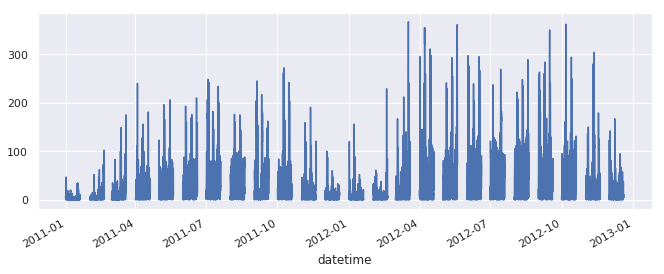

In [ ]:
combined_df['casual'].plot(grid=True)

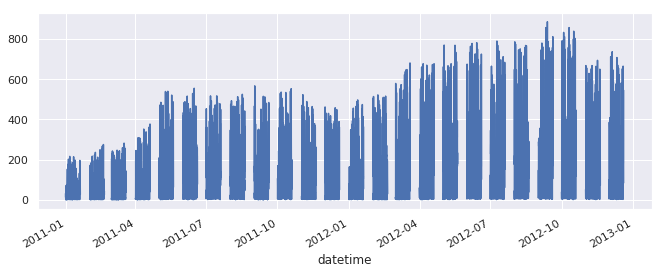

In [ ]:
combined_df['registered'].plot(grid=True)

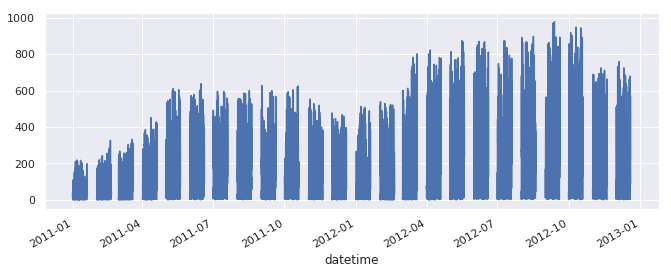

In [ ]:
combined_df['cnt'].plot(grid=True)

Text(0, 0.5, 'Hourly Use (1 Jan 11)')

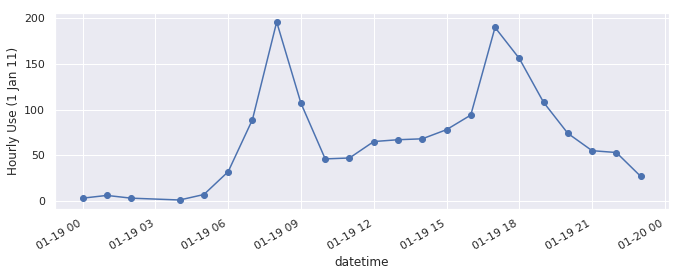

In [ ]:
ax = combined_df.loc['2011-01-19', 'registered'].plot(marker='o', linestyle='-')
ax.set_ylabel('Hourly Use (1 Jan 11)')

In [ ]:
grouped_multiple = combined_df.groupby(['year', 'month', 'day']).agg({'casual': ['sum']})
grouped_multiple.columns = ['casual_sum']
grouped_multiple = grouped_multiple.reset_index()
# grouped_multiple.plot(marker='o', linestyle='-')
print(grouped_multiple)

     year  month  day  casual_sum
0    2011      1    1       331.0
1    2011      1    2       131.0
2    2011      1    3       120.0
3    2011      1    4       108.0
4    2011      1    5        82.0
5    2011      1    6        88.0
6    2011      1    7       148.0
7    2011      1    8        68.0
8    2011      1    9        54.0
9    2011      1   10        41.0
10   2011      1   11        43.0
11   2011      1   12        25.0
12   2011      1   13        38.0
13   2011      1   14        54.0
14   2011      1   15       222.0
15   2011      1   16       251.0
16   2011      1   17       117.0
17   2011      1   18         9.0
18   2011      1   19        78.0
19   2011      1   20         0.0
20   2011      1   21         0.0
21   2011      1   22         0.0
22   2011      1   23         0.0
23   2011      1   24         0.0
24   2011      1   25         0.0
25   2011      1   26         0.0
26   2011      1   27         0.0
27   2011      1   28         0.0
28   2011     

In [ ]:
grouped_multiple = combined_df.groupby('holiday').agg({'workingday': ['sum']})
grouped_multiple.columns = ['workingday']
grouped_multiple = grouped_multiple.reset_index()
print(grouped_multiple)

   holiday  workingday
0        0       11865
1        1           0


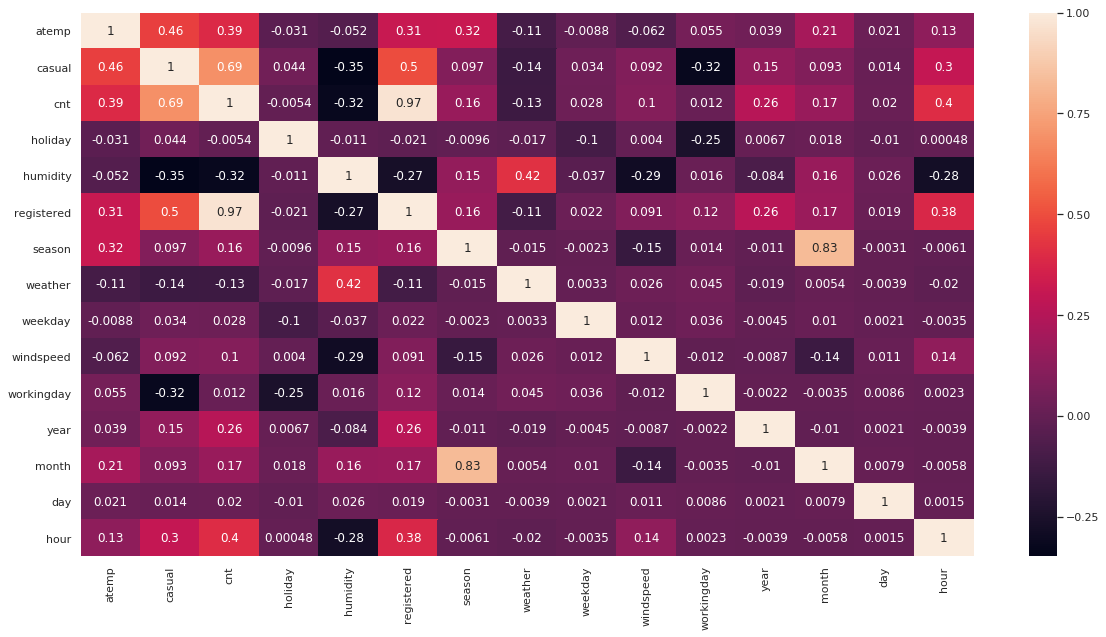

In [ ]:
combined_df = combined_df.drop('temp', axis=1)
fig=plt.gcf()
fig.set_size_inches(20, 10)
sns.heatmap(data = combined_df.corr(), annot=True, cbar=True)

In [ ]:
metrics = combined_df[combined_df.columns[combined_df.columns.isin(['casual', 'registered', 'cnt'])]]

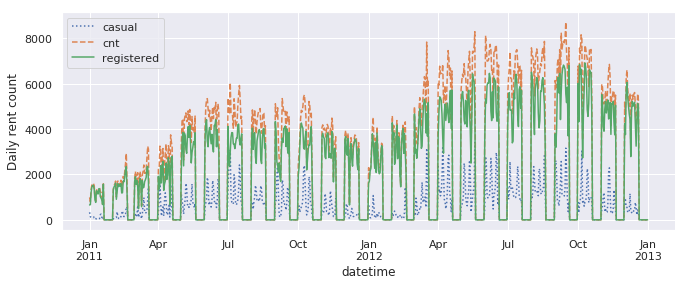

In [ ]:
daily_df = metrics.resample('D').sum()
daily_df.plot(style=[':', '--', '-'])
plt.ylabel('Daily rent count');

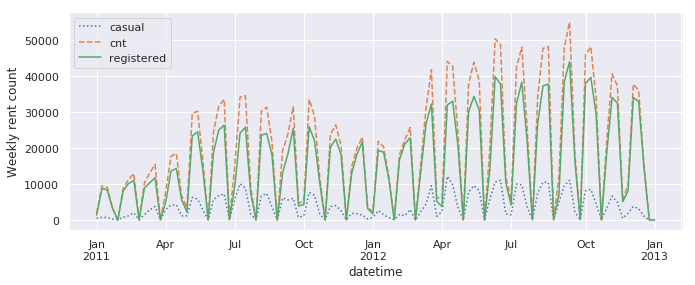

In [ ]:
weekly_df = daily_df.resample('W').sum()
weekly_df.plot(style=[':', '--', '-'])
plt.ylabel('Weekly rent count');

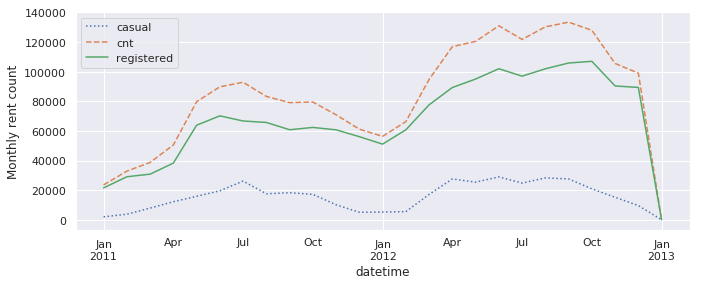

In [ ]:
monthly_df = weekly_df.resample('M').sum()
monthly_df.plot(style=[':', '--', '-'])
plt.ylabel('Monthly rent count');

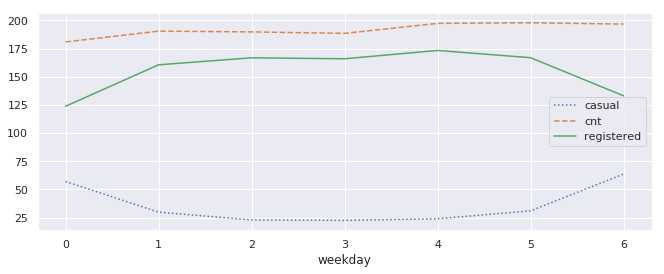

In [ ]:
by_weekday = metrics.groupby(combined_df['weekday']).mean()
by_weekday.plot(style=[':', '--', '-']);

In [ ]:
hourly_ticks = 1 * 60 * 60 * np.arange(24)

In [ ]:
weekend = np.where(combined_df['weekday'] == (6 or 0), 'Weekend', 'Weekday')
by_time = metrics.groupby([weekend, combined_df.index.time]).mean()

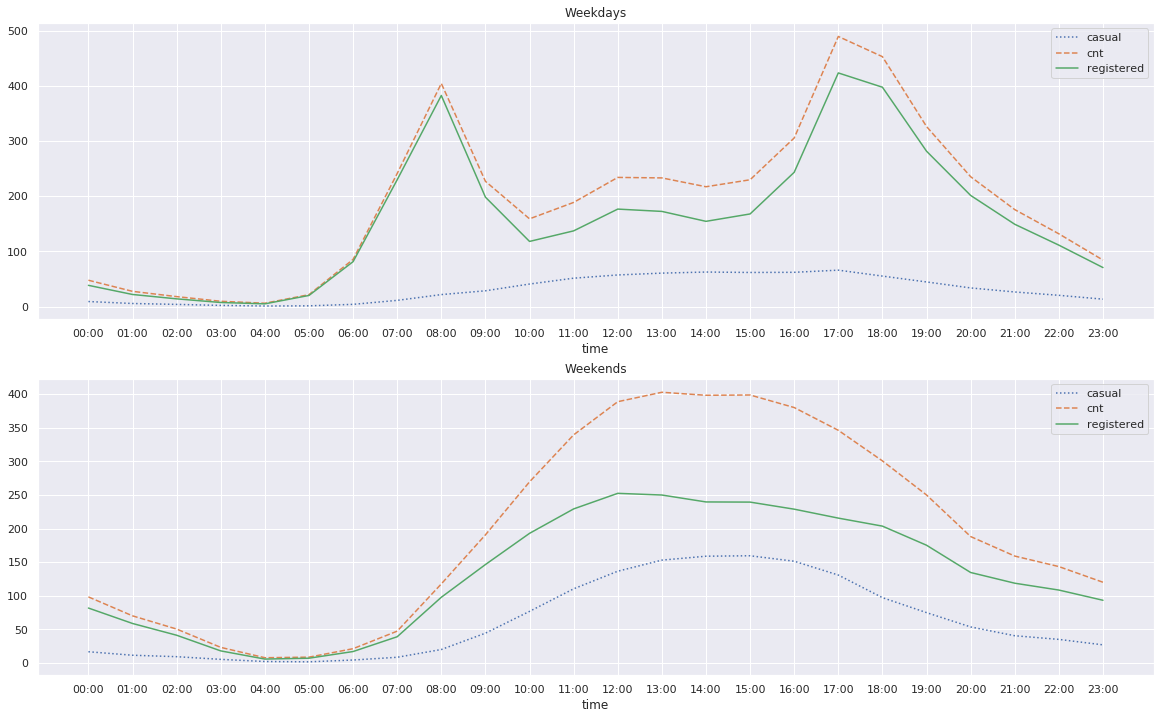

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(20, 12))
by_time.ix['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.ix['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']);

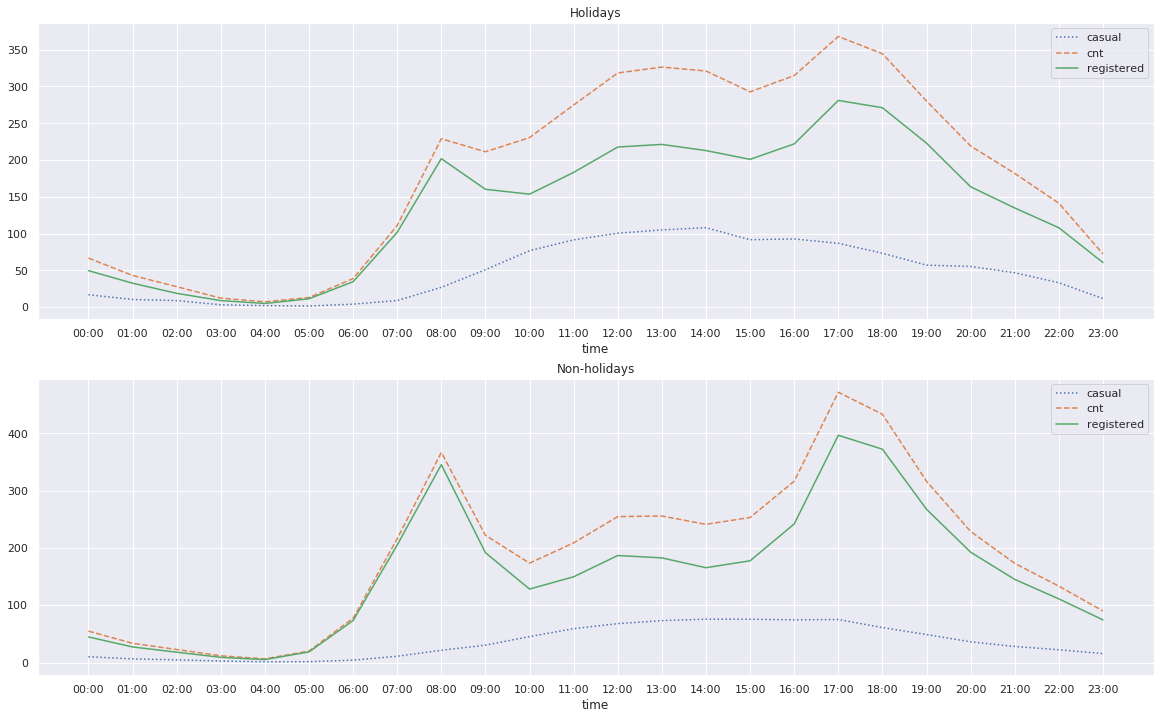

In [ ]:
holiday = np.where(combined_df['holiday'] == 1, 'Holiday', 'Non-holiday')
holiday_by_time = metrics.groupby([holiday, combined_df.index.time]).mean()

fig, ax = plt.subplots(2, 1, figsize=(20, 12))
holiday_by_time.ix['Holiday'].plot(ax=ax[0], title='Holidays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
holiday_by_time.ix['Non-holiday'].plot(ax=ax[1], title='Non-holidays',
                           xticks=hourly_ticks, style=[':', '--', '-']);

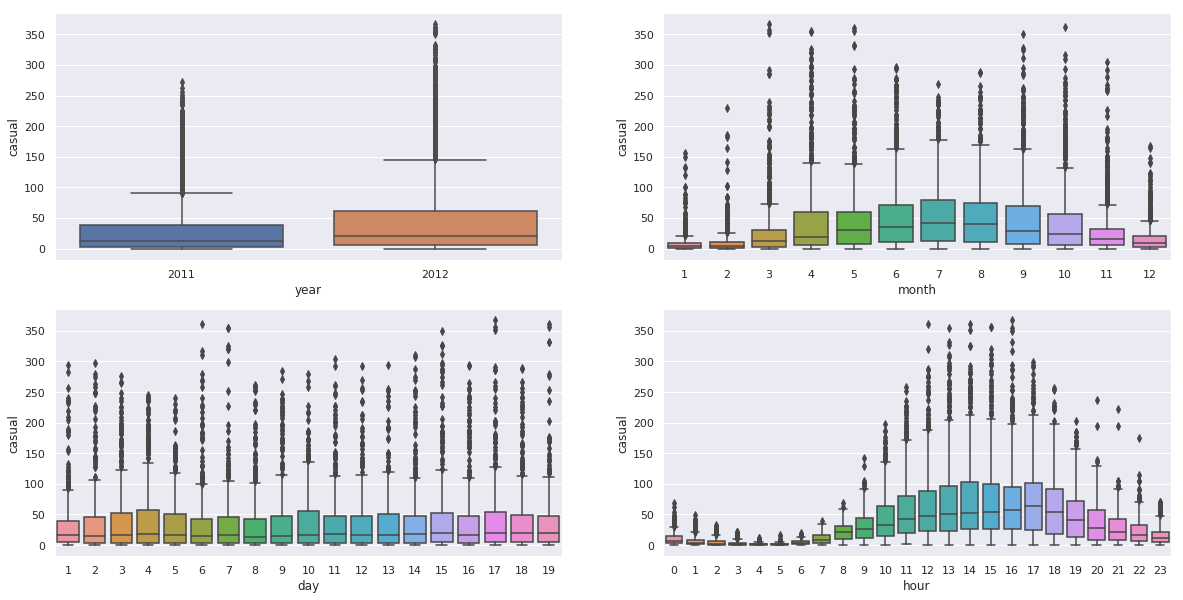

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
sns.boxplot(data = combined_df, y = 'casual', x = 'year', ax=ax[0][0])
sns.boxplot(data = combined_df, y = 'casual', x = 'month', ax=ax[0][1])
sns.boxplot(data = combined_df.dropna(), y = 'casual', x = 'day', ax=ax[1][0])
sns.boxplot(data = combined_df, y = 'casual', x = 'hour', ax=ax[1][1])

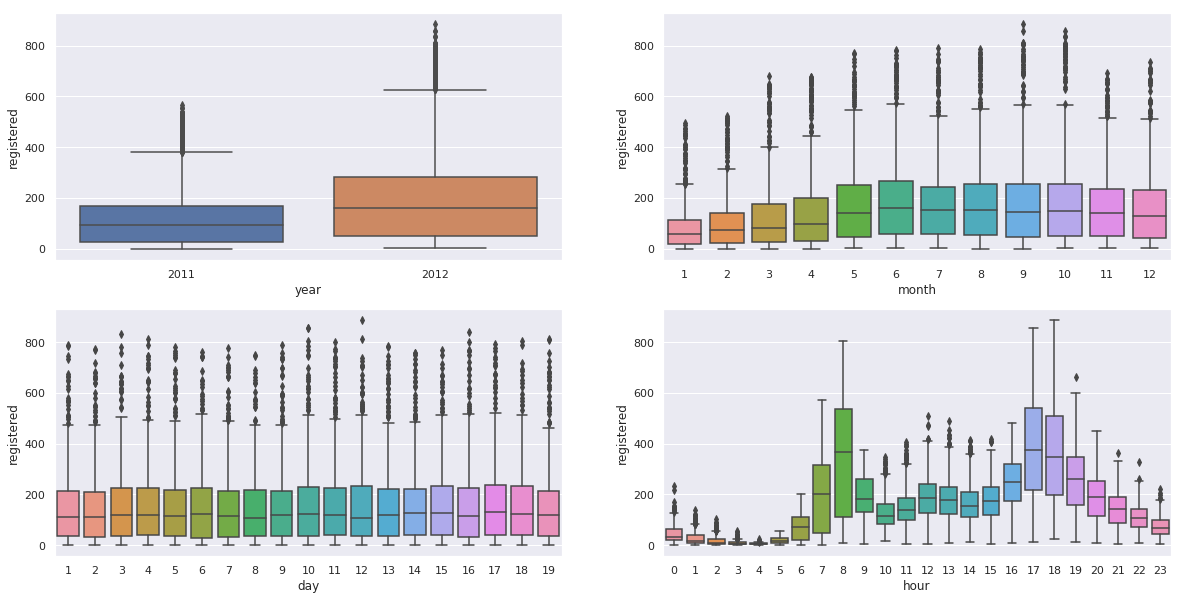

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
sns.boxplot(data = combined_df, y = 'registered', x = 'year', ax=ax[0][0])
sns.boxplot(data = combined_df, y = 'registered', x = 'month', ax=ax[0][1])
sns.boxplot(data = combined_df.dropna(), y = 'registered', x = 'day', ax=ax[1][0])
sns.boxplot(data = combined_df, y = 'registered', x = 'hour', ax=ax[1][1])

In [ ]:
combined_df.columns

Index(['atemp', 'casual', 'cnt', 'holiday', 'humidity', 'registered', 'season',
       'weather', 'weekday', 'windspeed', 'workingday', 'zee', 'year', 'month',
       'day', 'hour'],
      dtype='object')

In [ ]:
combined_df['weekend'] = 0
combined_df['hour_cat'] = 0

In [ ]:
combined_df.loc[combined_df.query("weekday == 0 or weekday == 6").index, 'weekend'] = 1
combined_df.sample(5, random_state=0)

,atemp,casual,cnt,holiday,humidity,registered,season,weather,weekday,windspeed,workingday,zee,year,month,day,hour,weekend,hour_cat
datetime,,,,,,,,,,,,,,,,,,
2011-05-28 05:00:00,0.5303,NaN,NaN,0,0.88,NaN,2,1,6,0.2239,0,test,2011,5,28,5,1,0
2011-10-05 04:00:00,0.4394,1.0,5.0,0,0.88,4.0,4,1,3,0.0000,1,train,2011,10,5,4,0,0
2012-10-11 19:00:00,0.4394,81.0,743.0,0,0.51,662.0,4,1,4,0.1343,1,train,2012,10,11,19,0,0
2012-02-20 11:00:00,0.2273,NaN,NaN,1,0.48,NaN,1,1,1,0.3582,0,test,2012,2,20,11,0,0
2012-06-15 21:00:00,0.6212,83.0,333.0,0,0.50,250.0,2,1,5,0.1045,1,train,2012,6,15,21,0,0


In [ ]:
combined_df.loc[combined_df.query("4 <= hour <= 5").index, 'hour_cat'] = 1
combined_df.loc[combined_df.query("6 <= hour <= 8 or 15 <= hour <= 17").index, 'hour_cat'] = 2
combined_df.loc[combined_df.query("9 <= hour <= 10").index, 'hour_cat'] = 3
combined_df.loc[combined_df.query("11 <= hour <= 14").index, 'hour_cat'] = 4
combined_df.loc[combined_df.query("18 <= hour <= 23 or 0 <= hour <= 3").index, 'hour_cat'] = 5

combined_df.hour_cat = combined_df.hour_cat.astype('int64')

combined_df.sample(5, random_state=1)

,atemp,casual,cnt,holiday,humidity,registered,season,weather,weekday,windspeed,workingday,zee,year,month,day,hour,weekend,hour_cat
datetime,,,,,,,,,,,,,,,,,,
2012-10-19 09:00:00,0.5152,26.0,389.0,0,0.94,363.0,4,2,5,0.1045,1,train,2012,10,19,9,0,3
2011-05-13 11:00:00,0.5000,56.0,146.0,0,0.83,90.0,2,2,5,0.1642,1,train,2011,5,13,11,0,4
2011-03-15 19:00:00,0.3182,14.0,152.0,0,0.71,138.0,1,2,2,0.2836,1,train,2011,3,15,19,0,5
2012-03-20 22:00:00,0.5152,NaN,NaN,0,0.77,NaN,1,1,2,0.0000,1,test,2012,3,20,22,0,5
2012-09-06 11:00:00,0.6667,10.0,62.0,0,0.84,52.0,3,3,4,0.1642,1,train,2012,9,6,11,0,4


In [ ]:
consecutive = []
counter = 0

for I in combined_df['weather'].values:
    if I > 2:
        counter += 1
    else:
        counter = 0
    consecutive.append(counter)

combined_df['durasi'] = consecutive

In [ ]:
features = ['atemp', 'holiday', 'humidity', 'season', 'day',
       'weather', 'weekday', 'windspeed', 'workingday', 'year', 'month',
       'hour', 'weekend', 'hour_cat', 'durasi']

In [ ]:
combined_df.columns

Index(['atemp', 'casual', 'cnt', 'holiday', 'humidity', 'registered', 'season',
       'weather', 'weekday', 'windspeed', 'workingday', 'zee', 'year', 'month',
       'day', 'hour', 'weekend', 'hour_cat', 'durasi'],
      dtype='object')

In [ ]:
X = combined_df.query("zee == 'train'")[features].values
Y_casual = combined_df.query("zee == 'train'")['casual'].values
Y_registered = combined_df.query("zee == 'train'")['registered'].values
Y_count = combined_df.query("zee == 'train'")['cnt'].values

In [ ]:
kf = KFold(shuffle = True,  n_splits=5)
error = 0
for train_index, test_index in kf.split(X):
    X_train, X_valid = X[train_index], X[test_index]
    y_casual_train, y_casual_valid = Y_casual[train_index], Y_casual[test_index]
    y_registered_train, y_registered_valid = Y_registered[train_index], Y_registered[test_index]
    
    lgb_train_casual = lgb.Dataset(X_train, np.log(y_casual_train+1))
    lgb_eval_casual = lgb.Dataset(X_train, np.log(y_casual_train+1), reference=lgb_train_casual)
    params = {}
    clf_casual = lgb.train(params,  lgb_train_casual, valid_sets=lgb_eval_casual)
    
    lgb_train_registered = lgb.Dataset(X_train, np.log(y_registered_train+1))
    lgb_eval_registered = lgb.Dataset(X_train, np.log(y_registered_train+1), reference=lgb_train_registered)
    clf_registered = lgb.train(params,  lgb_train_registered, valid_sets=lgb_eval_registered)

    prediction = np.exp(clf_casual.predict(X_valid)) + np.exp(clf_registered.predict(X_valid)) - 2
    current_rmsle = np.sqrt(mean_squared_log_error(y_casual_valid + y_registered_valid, prediction))
    print(current_rmsle)
    error += current_rmsle
    
print("Error CV ", error/5)

0.27131810711459275
0.26738490574973073
0.289405564990212
0.28235926941035294
0.27651142444694937
Error CV  0.2773958543423676


In [ ]:
len(features), len(clf_casual.feature_importance("gain"))

(15, 15)

In [ ]:
dictionary = {'feature name' : features,
              'casual' : clf_casual.feature_importance("gain") / sum(clf_casual.feature_importance("gain")), 
              'registered' : clf_registered.feature_importance("gain") / sum(clf_registered.feature_importance("gain"))}

pd.DataFrame(dictionary)

,feature name,casual,registered
0,atemp,0.220387,0.017738
1,holiday,0.000244,0.000244
2,humidity,0.032887,0.009765
3,season,0.011799,0.015006
4,day,0.005785,0.001947
5,weather,0.008461,0.003903
6,weekday,0.012331,0.010265
7,windspeed,0.002865,0.001115
8,workingday,0.047673,0.047988
9,year,0.014147,0.039894


In [ ]:
sample_df = pd.read_csv("/kaggle/input/bike-share-demand/sampleSubmission.csv")

In [ ]:
Z = combined_df.query("zee == 'test'")[combined_df.columns[~combined_df.columns.isin(['casual', 'registered', 'cnt', 'zee'])]].values

lgb_train_casual_final = lgb.Dataset(X, np.log(Y_casual+1))
lgb_eval_casual_final = lgb.Dataset(X, np.log(Y_casual+1), reference=lgb_train_casual_final)
params = {}
clf_casual_final = lgb.train(params,  lgb_train_casual_final, valid_sets=lgb_eval_casual_final)

lgb_train_registered_final = lgb.Dataset(X, np.log(Y_registered+1))
lgb_eval_registered_final = lgb.Dataset(X, np.log(Y_registered+1), reference=lgb_train_registered_final)
clf_registered_final = lgb.train(params,  lgb_train_registered_final, valid_sets=lgb_eval_registered_final)

prediction_final = np.exp(clf_casual_final.predict(Z)) + np.exp(clf_registered_final.predict(Z)) - 2

In [ ]:
sample_df['count'] = prediction_final
sample_df.head()

,datetime,count
0,2011-01-20 00:00:00,13.525633
1,2011-01-20 01:00:00,8.563585
2,2011-01-20 02:00:00,5.419535
3,2011-01-20 03:00:00,2.986039
4,2011-01-20 04:00:00,2.779892


In [ ]:
sample_df.to_csv("prediction.csv", index=False)